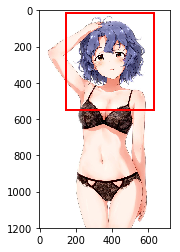

In [55]:
import cv2
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier('lbpcascade_animeface.xml')
img = cv2.imread('../dataset/FusionPics/origin/9733.jpg')
fig = plt.gca()
plt.imshow(img[:,:,::-1])

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)
faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 5, minSize = (24, 24))
for face in faces:
    (stx, sty, w, h) = face
    stx -= (w*0.3)
    sty -= (h*0.4)
    w *= 1.60
    h *= 1.75
    rect=plt.Rectangle((stx, sty),w,h,
                       linewidth=2,edgecolor='r',facecolor='none')
    fig.add_patch(rect)
plt.show()

In [2]:
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

imgs = glob('../dataset/FusionPics/detected/*.jpg')
print(len(imgs))
sizes = []
for img in tqdm(imgs):
    im = plt.imread(img)
    sizes.append(min(im.shape[0],im.shape[1]))

  0%|          | 14/49315 [00:00<06:40, 123.24it/s]

49315


100%|██████████| 49315/49315 [05:26<00:00, 150.98it/s]


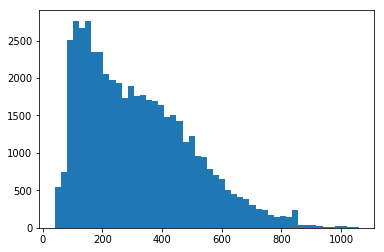

In [3]:
plt.hist(sizes, bins=50)
plt.show()

In [6]:
import numpy as np
imgs=np.array(imgs)
det_ind = np.where(np.array(sizes)<100)[0]
print(det_ind)

[    6    42    49 ... 49270 49303 49313]


In [7]:
det_imgs = imgs[det_ind]
import os
for d in det_imgs:
    os.remove(d)

In [15]:
sizes2 = []
imgs = np.array(glob('../dataset/FusionPics/detected/*.jpg'))
for img in tqdm(imgs):
    sizes2.append(os.path.getsize(img)/1024)
sizes2=np.array(sizes2)
det_ind = np.where(sizes2<10)[0]
print(det_ind.shape)

100%|██████████| 45705/45705 [00:00<00:00, 142457.73it/s]

(2829,)


In [16]:
det_imgs = imgs[det_ind]
import os
for d in det_imgs:
    os.remove(d)